In [11]:
from dataclasses import dataclass

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [12]:
# Copy of Experiment Output
from copied_result_data import *

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_fitness(
        data,
        invert=False,
        log_scale=False,
        benchmark_data=None,
        epsilon=1e-12,
        title="Fitness Over Generations"
):
    # Convert main data to DataFrame
    df = pd.DataFrame(data, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])

    # Apply reciprocal inversion if requested
    if invert:
        df['Min_Fitness'] = 1.0 / (df['Min_Fitness'] + epsilon)
        df['Avg_Fitness'] = 1.0 / (df['Avg_Fitness'] + epsilon)

    # Plot main data
    plt.figure(figsize=(8, 5))
    plt.plot(df['Generation'], df['Min_Fitness'], marker='o', label='Min. Ticks')
    plt.plot(df['Generation'], df['Avg_Fitness'], marker='o', label='Avg. Ticks')

    # Add benchmark line if provided
    if benchmark_data:
        benchmark_df = pd.DataFrame(benchmark_data, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
        benchmark_val = benchmark_df['Min_Fitness'].min()
        if invert:
            benchmark_val = 1.0 / (benchmark_val + epsilon)
        plt.axhline(y=benchmark_val, color='red', linestyle='--', label=f'Benchmark: {benchmark_val:.0f}')

    # Apply log scale if requested
    if log_scale:
        plt.yscale('log')

    # Labels and title
    plt.title(title)
    plt.xlabel('Generation')
    plt.ylabel('Objective')
    plt.gca().xaxis.set_major_locator(MultipleLocator(1))
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_fitness_static_two_sets(
        fixed_data,
        all_data,
        invert=False,
        log_scale=False,
        benchmark_data=None,
        epsilon=1e-12,
        title="Fitness Over Generations (Fixed vs All)"
):
    # Convert both datasets to DataFrames
    df_fixed = pd.DataFrame(fixed_data, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
    df_all = pd.DataFrame(all_data, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])

    # Apply reciprocal inversion if requested
    if invert:
        for df in (df_fixed, df_all):
            df['Min_Fitness'] = 1.0 / (df['Min_Fitness'] + epsilon)
            df['Avg_Fitness'] = 1.0 / (df['Avg_Fitness'] + epsilon)

    # Create figure
    plt.figure(figsize=(10, 6))

    # Plot Fixed
    plt.plot(df_fixed['Generation'], df_fixed['Min_Fitness'],
             color='C0', linewidth=2.0, marker='o', label='Fixed - Min')
    plt.plot(df_fixed['Generation'], df_fixed['Avg_Fitness'],
             color='C0', linewidth=1.5, linestyle=':', marker='o', alpha=0.8, label='Fixed - Avg')

    # Plot All
    plt.plot(df_all['Generation'], df_all['Min_Fitness'],
             color='C1', linewidth=2.0, marker='s', label='All - Min')
    plt.plot(df_all['Generation'], df_all['Avg_Fitness'],
             color='C1', linewidth=1.5, linestyle=':', marker='s', alpha=0.8, label='All - Avg')

    # Add benchmark line if provided
    if benchmark_data:
        benchmark_df = pd.DataFrame(benchmark_data, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
        benchmark_val = benchmark_df['Min_Fitness'].min()
        if invert:
            benchmark_val = 1.0 / (benchmark_val + epsilon)
        plt.axhline(y=benchmark_val, color='red', linestyle='--',
                    label=f'Benchmark: {benchmark_val:.0f}')

    # Axes labels, title, grid, and legend
    plt.title(title)
    plt.xlabel('Generation')
    plt.ylabel('Objective')
    plt.gca().xaxis.set_major_locator(MultipleLocator(1))
    if log_scale:
        plt.yscale('log')

    plt.grid(True, which='both', linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{title}.png")
    plt.show()


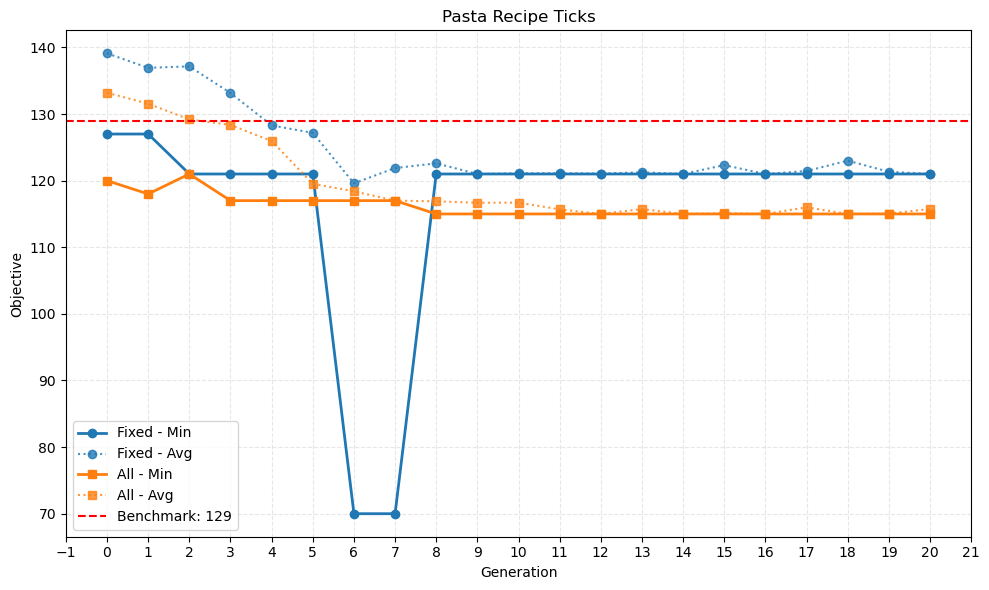

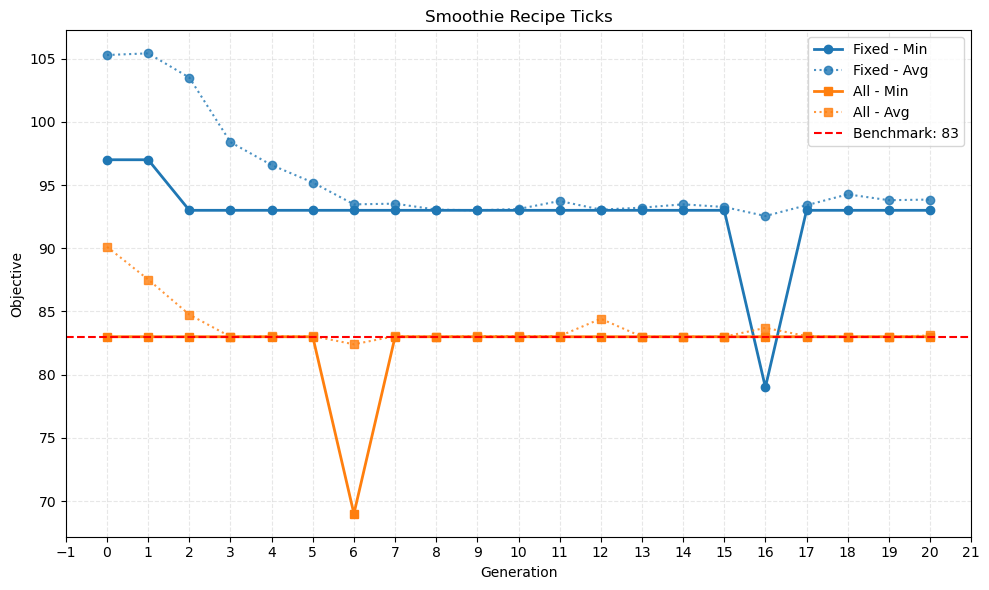

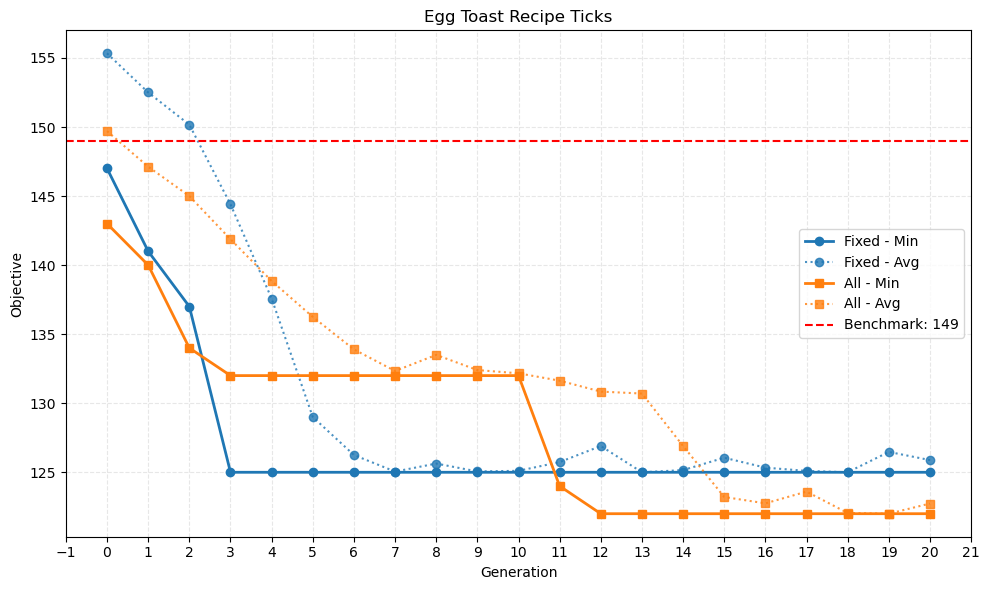

In [14]:
plot_fitness_static_two_sets(fixed_data=RESULT_SINGLE_PASTA_WITH_TOMATO_SAUCE_FIXED,
                             all_data=RESULT_SINGLE_PASTA_WITH_TOMATO_SAUCE_ALL,
                             benchmark_data=RESULT_SINGLE_PASTA_WITH_TOMATO_SAUCE_DISTANCE, title="Pasta Recipe Ticks")

plot_fitness_static_two_sets(fixed_data=RESULT_SINGLE_SMOOTHIE_FIXED,
                             all_data=RESULT_SINGLE_SMOOTHIE_ALL,
                             benchmark_data=RESULT_SINGLE_SMOOTHIE_DISTANCE,
                             title="Smoothie Recipe Ticks")

plot_fitness_static_two_sets(fixed_data=RESULT_SINGLE_EGG_TOAST_FIXED,
                             all_data=RESULT_SINGLE_EGG_TOAST_ALL,
                             benchmark_data=RESULT_SINGLE_EGG_TOAST_DISTANCE,
                             title="Egg Toast Recipe Ticks")

In [15]:
def stats_from_result_group(result_group):
    fixed_better = 0
    all_better = 0
    all_better_than_fixed = 0
    fixed_better_than_all = 0
    total = len(result_group)
    fixed_over_dist = []
    all_over_dist = []
    for recipe_group in result_group:
        run_all = pd.DataFrame(recipe_group[0], columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
        run_dist = pd.DataFrame(recipe_group[1], columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
        run_fixed = pd.DataFrame(recipe_group[2], columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])

        run_all_best = run_all['Min_Fitness'].min()
        run_dist_best = run_dist['Min_Fitness'].min()
        run_fixed_best = run_fixed['Min_Fitness'].min()

        if run_all_best < run_dist_best: all_better += 1
        if run_fixed_best < run_dist_best: fixed_better += 1
        if run_all_best < run_fixed_best: all_better_than_fixed += 1
        if run_fixed_best < run_all_best: fixed_better_than_all += 1

        fixed_over_dist.append(run_fixed_best / run_dist_best)
        all_over_dist.append(run_all_best / run_dist_best)

    print(f"Fixed better than dist: {fixed_better / total}")
    print(f"All better than dist: {all_better / total}")
    print(f"Fixed better than all: {fixed_better_than_all / total}")
    print(f"All better than fixed: {all_better_than_fixed / total}")
    print(f"Fixed avg. improvement over dist: {sum(fixed_over_dist) / total}")
    print(f"All avg. improvement over dist: {sum(all_over_dist) / total}")
    print(f"Fixed over dist: {fixed_over_dist}")
    print(f"All over dist: {all_over_dist}")


In [16]:
stats_from_result_group(RESULT_SINGLE_BY_RECIPE)

Fixed better than dist: 1.0
All better than dist: 1.0
Fixed better than all: 0.4
All better than fixed: 0.6
Fixed avg. improvement over dist: 0.8194696306184246
All avg. improvement over dist: 0.8838922350897281
Fixed over dist: [0.8389261744966443, 0.5426356589147286, 0.8317757009345794, 0.9518072289156626, 0.9322033898305084]
All over dist: [0.8187919463087249, 0.8914728682170543, 0.9626168224299065, 0.8313253012048193, 0.9152542372881356]


In [17]:
stats_from_result_group([RESULT_ALL_COMBINED_2])

Fixed better than dist: 0.0
All better than dist: 0.0
Fixed better than all: 0.0
All better than fixed: 1.0
Fixed avg. improvement over dist: 1.0648648648648649
All avg. improvement over dist: 1.0324324324324323
Fixed over dist: [1.0648648648648649]
All over dist: [1.0324324324324323]


In [18]:
stats_from_result_group([RESULT_ALL_COMBINED_4])

Fixed better than dist: 0.0
All better than dist: 1.0
Fixed better than all: 0.0
All better than fixed: 1.0
Fixed avg. improvement over dist: 21.50537634408602
All avg. improvement over dist: 0.9010752688172043
Fixed over dist: [21.50537634408602]
All over dist: [0.9010752688172043]


In [19]:
counter = 0
for run in RESULT_ALL_SINGLE:
    table = pd.DataFrame(run, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
    if counter == 0:
        print('')
        word = "Mixed"
    elif counter == 1:
        word = "Distance"
    elif counter == 2:
        word = "Fixed"
    counter += 1
    counter %= 3
    print(f'{word} {table['Min_Fitness'].min()}')


Mixed 122.0
Distance 149.0
Fixed 125.0

Mixed 115.0
Distance 129.0
Fixed 70.0

Mixed 103.0
Distance 107.0
Fixed 89.0

Mixed 69.0
Distance 83.0
Fixed 79.0

Mixed 108.0
Distance 118.0
Fixed 110.0


In [20]:
counter = 0
for run in RESULT_ALL_COMBINED_2:
    table = pd.DataFrame(run, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
    if counter == 0:
        print('')
        word = "Mixed"
    elif counter == 1:
        word = "Distance"
    elif counter == 2:
        word = "Fixed"
    counter += 1
    counter %= 3
    print(f'{word} {table['Min_Fitness'].min()}')

counter = 0
for run in RESULT_ALL_COMBINED_4:
    table = pd.DataFrame(run, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
    if counter == 0:
        print('')
        word = "Mixed"
    elif counter == 1:
        word = "Distance"
    elif counter == 2:
        word = "Fixed"
    counter += 1
    counter %= 3
    print(f'{word} {table['Min_Fitness'].min()}')


Mixed 191.0
Distance 185.0
Fixed 197.0

Mixed 419.0
Distance 465.0
Fixed 10000
